In [3]:
#Composing a song
import numpy as np
import matplotlib.pyplot as plt

samplerate = 44100 #Frequecy in Hz

def get_wave(freq, duration=0.5):
    '''
    Function takes the "frequecy" and "time_duration" for a wave 
    as the input and returns a "numpy array" of values at all points 
    in time
    '''
    
    amplitude = 4096
    t = np.linspace(0, duration, int(samplerate * duration))
    wave = amplitude * np.sin(2 * np.pi * freq * t)
    
    return wave

In [2]:
# To get a 1 second long wave of frequency 440Hz
a_wave = get_wave(440, 1)

#wave features
print(len(a_wave)) # 44100
print(np.max(a_wave)) # 4096
print(np.min(a_wave)) # -4096

44100
4095.9996855891045
-4095.999685589104


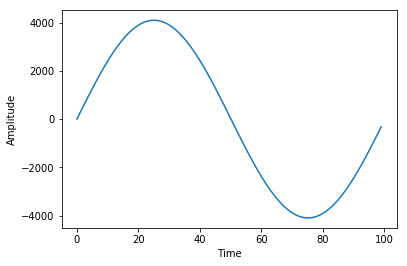

In [4]:
plt.plot(a_wave[0:int(44100/440)])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

If we want to create a single octave (set of 12 keys), then we must know how each key is calibrated in relation to the other. After that, we can just double (or half) the frequency of all the keys, to get the next octave.
Pianos are tuned using an “equal temperament system”. That means the relationship between the frequency of the keys (notes) is like this

Where n is the number of notes away from the base note.
For example, if we consider C as our base note, then C# will have the frequency = base_freq * 2^(1/12)

In [5]:
def get_piano_notes():
    '''
    Returns a dict object for all the piano 
    note's frequencies
    '''
    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    base_freq = 261.63 #Frequency of Note C4
    
    note_freqs = {octave[i]: base_freq * pow(2,(i/12)) for i in range(len(octave))}        
    note_freqs[''] = 0.0 # silent note
    
    return note_freqs

In [7]:
note_freqs = get_piano_notes()
note_freqs

{'C': 261.63,
 'c': 277.18732937722245,
 'D': 293.66974569918125,
 'd': 311.1322574981619,
 'E': 329.63314428399565,
 'F': 349.2341510465061,
 'f': 370.00069432367286,
 'G': 392.0020805232462,
 'g': 415.31173722644,
 'A': 440.00745824565865,
 'a': 466.1716632541139,
 'B': 493.8916728538229,
 '': 0.0}

In [8]:
def get_song_data(music_notes):
    '''
    Function to concatenate all the waves (notes)
    '''
    note_freqs = get_piano_notes() # Function that we made earlier
    song = [get_wave(note_freqs[note]) for note in music_notes.split('-')]
    song = np.concatenate(song)
    return song

In [14]:
import IPython.display as ipd
sr = 44100
music_notes = 'C-C-G-G-A-A-G--F-F-E-E-D-D-C--G-G-F-F-E-E-D--G-G-F-F-E-E-D--C-C-G-G-A-A-G--F-F-E-E-D-D-C'
data = get_song_data(music_notes)

data = data * (16300/np.max(data)) # Adjusting the Amplitude (Optional)
song = data.astype(np.int16)
ipd.Audio(song, rate=sr) # load a NumPy array